# INM 702 Coursework Code: Task 1
## Implementation of ReLu activation on forward and backward pass
### By: Jasveen Kaur and Nikhil Vallakati

Importing the necessary packages for matrix computation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

ReLu Activation Function definition and its derivative on a single element and array:


In [2]:
def relu(x):
    return np.maximum(0.0, x)

def relu_d_element(x):
    if x <= 0:
        return 0
    else:
        return 1
def relu_d_array(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

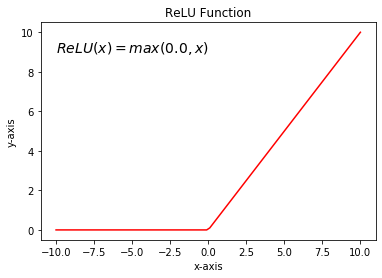

In [3]:
X = np.linspace(-10, 10, 100)
plt.plot(X, relu(X),'r')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('ReLU Function')
plt.text(-10, 9, r'$ReLU(x)=max(0.0, x)$', fontsize=14)
plt.show()

Sigmoid Activation function definition (to be used on the output of the network):

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

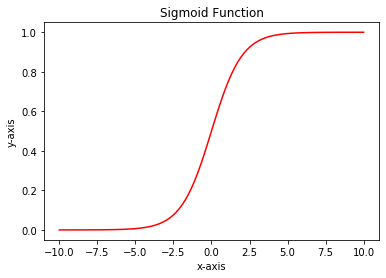

In [5]:
X = np.linspace(-10, 10, 100)
from matplotlib import pyplot as plt
plt.plot(X, sigmoid(X), c="r")
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Sigmoid Function')
plt.show()

Defining a sample input array (6x3) along with its label (6x1) to implement forward and backward pass:

In [6]:
input_set = np.array([[0,1,0],
                      [0,0,1],
                      [1,0,0],
                      [1,1,0],
                      [1,1,1],
                      [0,1,1],])#Dependent variable
labels = np.array([[1,
                    0,
                    0,
                    1,
                    1,
                    0,]])
labels = labels.reshape(6,1)

Forward and backward pass on the above defined array, with Relu activation on the hidden layer and Relu/Sigmoid on the output:

In [7]:
class neural_network(object):

    def __init__(self, n_hidden, epochs, lr, seed, out_act):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.epochs = epochs
        self.lr = lr
        self.seed = seed
        self.out_act = out_act
        
    #sigmoid activation function
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))
    
    #relu activation function
    def relu(self, x):
        return np.maximum(0, x) 
    
    #derivative of relu activation function(element)
    def relu_d_element(self, x):
        if x > 0:
            return 1
        elif x <= 0:
            return 0
    
    #derivative of relu activation function(array)
    def relu_d_array(self, x):
        x[x<=0] = 0
        x[x>0] = 1
        return x

    #forward pass
    def forward_pass(self, X):
        
        z1 = np.dot(X, self.w1) + self.b1
        a1 = self.relu(z1)
        
        z_out = np.dot(a1, self.w_out) + self.b_out
        
        if self.out_act == 'sigmoid':
            a_out = self.sigmoid(z_out)
        else:
            a_out = self.relu(z_out)

        return z1, a1, z_out, a_out   

    #computing the loss
    def compute_cost(self, y_enc, a_out):
        term1 = a_out - y_enc 
        cost = term1.sum()
        return cost
    
    #predicting the output
    def predict_out(self, X):
        z1, a1,z_out, a_out = self.forward_pass(X)
        y_pred = np.argmax(a_out, axis=1)
        return y_pred
    
    #calculating the accuracy
    def accuracy(self, y, y_pred, X):
        return ((np.sum(y.T == y_pred)).astype(np.float) / X.shape[0])
    
    def train(self, X_train, y_train):

        n_output = np.unique(y_train).shape[0] 
        n_features = X_train.shape[1]

        #Initializing the weights
        
        #hidden layer
        self.b1 = np.zeros(self.n_hidden)
        self.w1 = self.random.normal(loc=0.0, scale=0.1,size=(n_features, self.n_hidden))
        
        #output layer
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))
        
        self.results = {'cost': [], 'train_acc': []}  
        
        #training epochs
        for i in range(self.epochs):
            
            # forward propagation
            z1, a1, z_out, a_out = self.forward_pass(X_train)
            
            # Backpropagation
            sigma_out = a_out - labels 
            error = sigma_out
            relu_derivative = self.relu_d_array(a1)
            sigma_h1 = (np.dot(sigma_out, self.w_out.T) * relu_derivative)
                
            grad_w1 = np.dot(X_train.T, sigma_h1)
            grad_b1 = np.sum(sigma_h1, axis=0)

            grad_w_out = np.dot(a1.T, sigma_out)
            grad_b_out = np.sum(sigma_out, axis=0)

            delta_w1 = grad_w1
            delta_w_out = grad_w_out  
            
            delta_b1 = grad_b1
            delta_b_out = grad_b_out
                
            #updating the weights
            self.w1 -= self.lr * delta_w1
            self.w_out -= self.lr * delta_w_out

            self.b1 -= self.lr * delta_b1           
            self.b_out -= self.lr * delta_b_out

        
            #evaluating the trained model with updated weights
            z1, a1, z_out, a_out = self.forward_pass(X_train)
            
            cost = self.compute_cost(y_enc=labels, a_out=a_out)
            y_train_pred = self.predict_out(X_train)

            train_acc = self.accuracy(y_train, y_train_pred, X_train)
            #cost/loss = sigma_out.sum()
            print("epoch:", i+1)
            print("Accuracy:","{:.2f}".format(train_acc*100),"% ||","loss:","{:.3f}".format(cost))

            self.results['cost'].append(cost)
            self.results['train_acc'].append(train_acc)
            
        return self


Initializing the parameters and propagating through one layer network

In [10]:
Model = neural_network(n_hidden=7, epochs=1000, lr=0.0005, seed=1, out_act = 'relu')
Model.train(X_train=input_set, 
       y_train=labels)

epoch: 1
Accuracy: 50.00 % || loss: -5.927
epoch: 2
Accuracy: 66.67 % || loss: -5.912
epoch: 3
Accuracy: 66.67 % || loss: -5.894
epoch: 4
Accuracy: 66.67 % || loss: -5.875
epoch: 5
Accuracy: 66.67 % || loss: -5.856
epoch: 6
Accuracy: 66.67 % || loss: -5.837
epoch: 7
Accuracy: 66.67 % || loss: -5.818
epoch: 8
Accuracy: 66.67 % || loss: -5.797
epoch: 9
Accuracy: 66.67 % || loss: -5.777
epoch: 10
Accuracy: 66.67 % || loss: -5.756
epoch: 11
Accuracy: 66.67 % || loss: -5.736
epoch: 12
Accuracy: 66.67 % || loss: -5.716
epoch: 13
Accuracy: 66.67 % || loss: -5.695
epoch: 14
Accuracy: 66.67 % || loss: -5.675
epoch: 15
Accuracy: 66.67 % || loss: -5.655
epoch: 16
Accuracy: 66.67 % || loss: -5.635
epoch: 17
Accuracy: 66.67 % || loss: -5.615
epoch: 18
Accuracy: 66.67 % || loss: -5.595
epoch: 19
Accuracy: 66.67 % || loss: -5.575
epoch: 20
Accuracy: 66.67 % || loss: -5.555
epoch: 21
Accuracy: 66.67 % || loss: -5.536
epoch: 22
Accuracy: 66.67 % || loss: -5.516
epoch: 23
Accuracy: 66.67 % || loss: -5.4

epoch: 323
Accuracy: 66.67 % || loss: -1.337
epoch: 324
Accuracy: 66.67 % || loss: -1.327
epoch: 325
Accuracy: 66.67 % || loss: -1.318
epoch: 326
Accuracy: 66.67 % || loss: -1.309
epoch: 327
Accuracy: 66.67 % || loss: -1.299
epoch: 328
Accuracy: 66.67 % || loss: -1.290
epoch: 329
Accuracy: 66.67 % || loss: -1.281
epoch: 330
Accuracy: 66.67 % || loss: -1.272
epoch: 331
Accuracy: 66.67 % || loss: -1.262
epoch: 332
Accuracy: 66.67 % || loss: -1.253
epoch: 333
Accuracy: 66.67 % || loss: -1.244
epoch: 334
Accuracy: 66.67 % || loss: -1.235
epoch: 335
Accuracy: 66.67 % || loss: -1.226
epoch: 336
Accuracy: 66.67 % || loss: -1.217
epoch: 337
Accuracy: 66.67 % || loss: -1.208
epoch: 338
Accuracy: 66.67 % || loss: -1.200
epoch: 339
Accuracy: 66.67 % || loss: -1.191
epoch: 340
Accuracy: 66.67 % || loss: -1.182
epoch: 341
Accuracy: 66.67 % || loss: -1.173
epoch: 342
Accuracy: 66.67 % || loss: -1.164
epoch: 343
Accuracy: 66.67 % || loss: -1.156
epoch: 344
Accuracy: 66.67 % || loss: -1.147
epoch: 345

Accuracy: 83.33 % || loss: 0.161
epoch: 652
Accuracy: 83.33 % || loss: 0.162
epoch: 653
Accuracy: 83.33 % || loss: 0.163
epoch: 654
Accuracy: 83.33 % || loss: 0.164
epoch: 655
Accuracy: 83.33 % || loss: 0.164
epoch: 656
Accuracy: 83.33 % || loss: 0.165
epoch: 657
Accuracy: 83.33 % || loss: 0.166
epoch: 658
Accuracy: 83.33 % || loss: 0.167
epoch: 659
Accuracy: 83.33 % || loss: 0.167
epoch: 660
Accuracy: 83.33 % || loss: 0.168
epoch: 661
Accuracy: 83.33 % || loss: 0.169
epoch: 662
Accuracy: 83.33 % || loss: 0.170
epoch: 663
Accuracy: 83.33 % || loss: 0.170
epoch: 664
Accuracy: 83.33 % || loss: 0.171
epoch: 665
Accuracy: 83.33 % || loss: 0.172
epoch: 666
Accuracy: 83.33 % || loss: 0.172
epoch: 667
Accuracy: 83.33 % || loss: 0.173
epoch: 668
Accuracy: 83.33 % || loss: 0.174
epoch: 669
Accuracy: 83.33 % || loss: 0.174
epoch: 670
Accuracy: 83.33 % || loss: 0.175
epoch: 671
Accuracy: 83.33 % || loss: 0.176
epoch: 672
Accuracy: 83.33 % || loss: 0.176
epoch: 673
Accuracy: 83.33 % || loss: 0.177

Accuracy: 83.33 % || loss: 0.245


Using Relu on hidden and output layer gave less accuracy in the first few epochs but was soon comparable enough to the accuracy of using Relu on hidden and sigmoid on output layer. The final accuracy after 600 epochs is 83.33%

Graph for the loss function¶

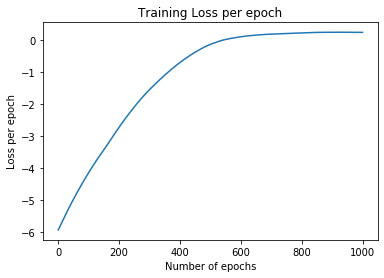

In [12]:
plt.plot(range(Model.epochs), Model.results['cost'])
plt.ylabel('Loss per epoch')
plt.xlabel('Number of epochs')
plt.title('Training Loss per epoch')
plt.show()

Graph for the Accuracy¶

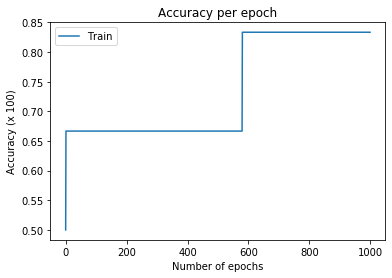

In [13]:
plt.plot(Model.results['train_acc'], 
         label='Train')
plt.ylabel('Accuracy (x 100)')
plt.xlabel('Number of epochs')
plt.legend()
plt.title('Accuracy per epoch')
plt.show()